$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 4, part 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Fully-connected deep neural networks**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Emilio, Simon** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Adam Olsson, 19950418-xxxx, adaolss@student.chalmers.se** <br />

General guidelines:
* All solutions to theoretical and practical problems should be submitted in this Jupyter notebook.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.  
* Your name, personal number and email address should be specified above.

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:

1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

In this assignment you will be using the `pytorch` package. Installation instructions can be found on the [pytorch homepage](https://pytorch.org/get-started/locally/).

# Introduction

In this assignment, you will be working extensively with vectors, matrices and tensors. A rank-$k$ tensor with shape
$(n_1, \ldots, n_k)$ can be defined as a collection of scalar variables $X_{i_1, \ldots, i_k} \in \mathrm{R}$ where
each of the indices $i_j, j \in [1, k]$ can take values in the range $[1, n_j]$.

You can think of a tensor as a mathematical representation of a multi-dimensional array. This multi-dimensional array
may hold for example a collection of input images that we want to feed into a neural network. In the case of
grey-scale images, these could be represented by a rank-3 tensor with the index $i_1$ representing the different
images in the collection, and $i_2, i_3$ the vertical and horizontal dimensions along each image. 

Note how vectors and matrices can be obtained from this definition as special cases for $k = 1$ and $k = 2$, respectively.

# Notation

We will use regular letters for scalar variables, bold letters for vector-valued variables, e.g. $\mathbf{v} \in 
\mathrm{R}^n$, and bold, capital letters for matrices and higher-dimensional tensors,
e.g. $\mathbf{W}$ for a matrix $\mathbf{W} \in \mathrm{R}^{m \times n}$. The scalar  elements of vectors
and matrices  will be written using regular letters and regular, capital letters, respectively:

$$
v_i \in \mathrm{R}, X_{i,j} \in \mathrm{R}
$$

If a subscript index is used to distinguish vector- or matrix-valued variables, we will use a colon to separate the
variable index and element indices:

- $v_{0:i}$ denotes the $i$th element of the vector $\mathbf{v}_0$ 
- $X_{0:i,j}$ denotes $j$th element of the $i$th row of the matrix $\mathbf{X}_0$

# Theoretical problems

## [Deep learning applications, 1 point]

Describe an application where deep learning is used in the real world.
Provide a reference to support your example.

One application of deep learning in the real world is within self-driving car. For example, these cars use neural networks for obstacle detection. This can vary from everything from a tree that has fallen over the road to a pedestrian crossing. Reference: https://ieeexplore.ieee.org/abstract/document/7995849

## [Backpropagation by hand, 1 point]

Consider the simple feed-forward neural network depicted in the figure below. This network
consists of a three-dimensional input layer $\mathbf{y}_0 = \mathbf{x}$,  one hidden layer
with activations $\mathbf{y}_1$ and a one-dimensional output layer with activations $\mathbf{y}_2$.

![](simple_nn.png)


The activations of a layer $i$ are computed by applying a linear transformation given by the weight matrix
$\mathbf{W}_i$ to the input activations $\mathbf{y}_{i - 1}$ producing the intermediate values $\mathbf{z}_i$:

$$
z_{i : j} = \sum_k W_{i:j, k} y_{i - 1:k} \\
$$

This is followed by the element-wise application of the layers'
activation function $f_i$ to the intermediate values $\mathbf{z}_i$:

$$
y_{i:j} = f_i (z_{i:j})
$$


### 1, a)

Given the derivative of an error term $E$ with respect to the activation of the output neuron 
$\frac{dE}{dy_{2:0}}$, derive expressions for the derivatives of the error term with respect to the weights
$W_{i:j,k}$ and activations $y_{i:j}$ of the remaining layers of the network.

To simplify your results, you are encouraged to reuse already computed derivative terms in the computation of
downstream derivatives.

$$
\begin{align}
\frac{dE}{dW_{2:i, j}} = \: ? \\
\frac{dE}{dy_{1:j}} = \: ? \\
\frac{dE}{dW_{1:i, j}} = \: ? \\
\frac{dE}{dy_{0:j}} = \: ? \\
\end{align}
$$

If your calculations are correct, you should see that you can express the derivatives of the error function 
around a given layer in the network using the derivatives from the next higher layer. This yields a simple
recipe to successively compute the gradients in a feed forward neural network by starting at the last layer and
then computing the gradients layer-by-layer as you move backwards through the network. This method is commonly
referred to as **backpropagation**.

$$
\begin{align}
\frac{dE}{dW_{2:i, j}} = \frac{\partial z_{2:i}}{\partial W_{2:i, j}}
\frac{\partial y_{2:i}}{\partial{z_{2:i}}} \frac{\partial E}{\partial y_{2:i}} = y_{1:j}f'(z_{2:0})\frac{\partial E}{\partial y_{2:0}}\\
\frac{dE}{dy_{1:j}} = \sum_{i = 0}^{N_{2} - 1} \frac{\partial z_{2:i}}{\partial y_{1:j}}\frac{\partial y_{2:i}}{\partial z_{2:i}}\frac{\partial E}{\partial y_{2:i}} = \sum_{i = 0}^{2:j} w_{2:j} f'(z_{2:0})\frac{\partial E}{\partial y_{2:0}}\\
\frac{dE}{dW_{1:i, j}} = \frac{\partial z_{1:i}}{\partial W_{1:i, j}}\frac{\partial y_{1:i}}{\partial{z_{1:i}}}\frac{\partial E}{\partial y_{1:i}} = y_{0:j}f'(z_{1:i})\frac{\partial E}{\partial y_{1:i}} \\
\frac{dE}{dy_{0:j}} = \sum_{i = 0}^{N_{1} - 1} \frac{\partial z_{1:i}}{\partial y_{0:j}}\frac{\partial y_{1:i}}{\partial z_{1:i}}\frac{\partial E}{\partial y_{1:i}} = \sum_{i = 0}^{2}w_{1:i,j} f'(z_{1:i})\frac{\partial E}{\partial y_{1:i}}\\
\end{align}
$$

Where $N_{i}$ is the number of nodes in layer $i$.

## [Chain rule for tensors, 6 points]


In principle, the results from the previous exercise are sufficient to implement back propagation to train a neural
network using stochastic gradient descent, that is if the network is trained one sample at a time. In reality,
however, it is desirable to be able to train neural networks on batches of input vectors as well as higher-dimensional inputs, such as images. A generalized form of the back propagation algorithm for tensor-valued input can be obtained from the chain rule for tensor functions, which you will derive in this exercise.

### 2, a)

Consider the following two functions:

-  A tensor-valued function 
$\mathbf{u}: \mathrm{R}^{n_{1} \times \ldots \times n_{k}} \rightarrow \mathrm{R}^{m_1 \times \ldots \times m_l}$
mapping a $k$-Tensor $\mathbf{X} = X_{i_1,\ldots, i_{k}}$ to a $l$-Tensor
$\mathbf{u}(\mathbf{X}) = u_{j_1, \ldots j_{l}}(\mathbf{X})$ 

- A scalar-valued function $v : \mathrm{R}^{m_1 \times \ldots \times m_l} \rightarrow \mathrm{R}$ that maps
  a $l$-Tensor $\mathbf{X} = X_{i_1,\ldots, i_l}$  to a scalar value $v(\mathbf{X})$
  
Derive an expression for the gradient tensor of the composition  $w(\mathbf{X})  = v(\mathbf{u}(\mathbf{X}))$
of the two functions $\mathbf{u}$ and $v$ in terms of their respective gradient tensors
$\frac{dv(\mathbf{X})}{dx_{i_1, \ldots, i_l}} = \frac{dv(\mathbf{X})}{d\mathbf{X}}$ and
$\frac{du_{j_1, \ldots, j_l}(\mathbf{X})}{dx_{i_1, \ldots, i_k}} = \frac{d\mathbf{u}(\mathbf{X})}{d\mathbf{X}}$:

$$
\frac{dw(\mathbf{X})}{dx_{i_1, \ldots, i_k}} = \frac{dw(\mathbf{X})}{d\mathbf{X}} =  \frac{dw}{d\mathbf{u}}\frac{d\mathbf{u}}{d\mathbf{X}}
$$

### 2, b)

Now consider a fully-connected layer in a  neural network. In the forward
propagation phase, the layer receives a batch of input activations in the form of a matrix
$\mathbf{Y}_{i - 1} \in \mathrm{R}^{n \times k}$, where $n$ is the number of input
features of the layer and $k$ the number of samples in the batch. The input activations
are multiplied by the weight matrix $\mathbf{W}_i$ of the layer, to obtain the matrix
$\mathbf{Z}_i = \mathbf{W}_i \mathbf{Y}_{i-1}$ of intermediate activations for the batch.
From these, the matrix of output activations  are computed by element-wise
application of the activation function $\mathbf{Y}_{i} = f_i(\mathbf{Z}_i)$ to the 
intermediate activations $\mathbf{Z}_i$.
Note that $f_i$ is a scalar function and $f_i(\mathbf{Z}_i)$ an abbreviation for
the matrix-valued function $\mathbf{v}(\mathbf{Z}_i)$ obtained by applying the
function $f_i$ to each element of $\mathbf{Z}$:

$$
v_{j, k}(\mathbf{Z}) = f_i(Z_{i:j,k})
$$

The layer can be viewed as the composition of the linear transformation

$$
\mathbf{u}(\mathbf{Y}_{i - 1}, \mathbf{W}_i) = \mathbf{W}_i\mathbf{Y}_{i - 1}
$$

and the element-wise application of the activation function

$$
\mathbf{v}(\mathbf{Z}_i) = f_i(Z_{i:j, k})
$$

Compute the gradient tensors of the functions $\mathbf{u}$ and $\mathbf{v}$ for this layer. What is special about the structure of
the tensors?

$$
\frac{dv_{j, k}(\mathbf{Z}_i)}{dZ_{i : l, m}} =  \frac{df_i(\mathbf{Z}_{i:j,k})}{dZ_{i : l, m}} = f'(\mathbf{Z}_{i:l,m}) \\
\frac{du_{j, k}(\mathbf{Y}_{i - 1}, \mathbf{W}_i)}{dY_{i - 1:l, m}} = \frac{\partial}{dY_{i - 1:l, m}}(\sum_{m = 1}^{n}w_{i:m,l}y_{i-1:l,m})= w_{j,l} \\
\frac{du_{j, k}(\mathbf{Y}_{i - 1}, \mathbf{W}_i)}{dW_{i:l, m}} = \frac{\partial}{dW_{i:l, m}}(\sum_{m = 1}^{n}w_{i:l,m}y_{i-1:m,k})= y_{i-1:m,k} \\
$$

### 2, c)

We could now apply the chain rule for tensor functions derived in **a)** to obtain the backward propagation rule to
compute the weight and input-activation gradients  from the error-function gradient of the output
activations of the layer. However, straight-forward application of the rule would yied products involving four
dimensional gradient tensors. A computationally much more efficient formulation using only matrix-matrix products and
element-wise products of matrices can be obtained when the special structure of the gradients derived in the steps
above is taken into account.

Derive expressions for the weight- and input-activation gradients, $\frac{dE}{d\mathbf{W}_{i}}$ and
$\frac{dE}{d\mathbf{Y}_{i-1}}$, from the incoming gradient $\frac{dE}{d\mathbf{Y}_i}$ of the error
$E$ with respect to the output activation of the layer. You should only use matrix-matrix and
element-wise multiplication of matrices. Use $\odot$ to write the element-wise products of matrices.

$$
\frac{dE}{d\mathbf{W}_i} = \frac{\partial \mathbf{Z}_{i}}{\partial \mathbf{W}_{i}}(\frac{\partial \mathbf{Y}_{i}}{\partial \mathbf{Z}_{i}} \odot \frac{\partial E}{\partial  \mathbf{Y}_{i}}) = \mathbf{Y}_{i-1}(f'(\mathbf{Z}_{i})\odot \frac{\partial E}{\partial  \mathbf{Y}_{i}}) \\
\frac{dE}{d\mathbf{Y}_{i - 1}} = \frac{\partial \mathbf{Z}_{i}}{\partial \mathbf{Y}_{i-1}}(\frac{\partial \mathbf{Y}_{i}}{\partial \mathbf{Z}_{i}} \odot \frac{\partial E}{\partial  \mathbf{Y}_{i}}) = \mathbf{W}_{i}^T(f'(\mathbf{Z}_{i})\odot \frac{\partial E}{\partial  \mathbf{Y}_{i}})
$$

# Practical problems

## [Implementing a Fully-connected layer, 4 points]

There are two important advantages of the formulation of backprop for fully-connected layers that you derived above:

- The formulation is independent of batch size. That means it works for a single input sample as well as a batch
  containing several hundreds of them.
- The forward and backward operations can be implemented using matrix operations. Efficient implementations of these
  are available in basically every programming language and are often already parallelized.

This allows us to write our own implementation of a dense layer in numpy that can be applied to realistic data sets.

#### 3a)

Implement the forward and backward member functions of the `CustomLayer` class defined below so that it implements a fully-connected neural network layer with ReLU activation functions:

$$
\mathbf{Y}_{i} = f(\mathbf{W_i} \mathbf{Y}_{i - 1}) \\
f(x) = \begin{cases} x & \text{if } x \geq 0 \\ 0 & \text{otherwise} \end{cases}
$$
    
For the sake of computational efficiency, you are not allowed to use any explicit loops. All necessary operations
can be implemented using the operators `*` and `@` for element-wise and matrix-matrix products together with a few
more numpy built-in functions. Check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.ndarray.html) for a list functions that are available.

In [1]:
import numpy as np

class CustomLayer:
    """
    The CustomLayer class implements a fully connected layer with ReLU activation
    funtions.
    
    Attributes:
        
        w(numpy.ndarray): The weight matrix defining the strengths of the
            connections between input and output neurons of the layer.
    """
    def __init__(self, w):
        """
        Create a CustomLayer instance with weight matrix w.
        """
        self.w = w
        
    def forward(self, y_in):
        """ Forward propagate the input activations through the layer.
        
        Args:
            y_in(numpy.ndarray): Vector of input activations
            
        Returns:
            y_out(numpy.ndarray): Output activations of the layer.
        """
        
        z = self.w @ y_in 
        y_out = (abs(z) + z) / 2 # ReLU

        # Note that you also need to store the input activations
        # and the intermediate values z since the are needed
        # in the computation of the backward step.
        self.y_in = y_in
        self.z = z
        
        return y_out
    
    def backward(self, dedy_out):
        """ Backward propagate gradients of loss function through the layer.
        
        Args:
            dedy_out(np.ndarray): Gradients of loss function w.r.t. output
                activations.
        Returns:
            (dedy_in, dedw): Tuple containing the loss gradients w.r.t to input
                activations (dedy_in) and the weight matrix of the layer (dedw).
        """
        
        
        '''
        How am i suppose to calculate the gradient? Am i suppose to call nn.backwards() on a tensor? Because if so
        there are som operations i am not able to get
        '''
        
        # Heaviside
        dy_outdz = np.heaviside(self.z, 1)
        
        # dedz is elementwise multiplication between the dy_outdz and de_dy_out
        dedz = dy_outdz * dedy_out # shape = (2,1000) = (noNodes x batchSize)
    
        # Output size of dedy should be (noOutputNodes x noWeights x batchSize)
        dedy = self.w.T @ dedz # size of dedy = (noNodesIn x batchSize)
        
        y_in3 = self.y_in[:,np.newaxis]
        
        # Create a 3D matrix (cube) from dedz. Batch instances along axis 2, nodes along axis 0.
        dedz2 = np.transpose(np.repeat(dedz[:,np.newaxis], self.y_in.shape[0], 1), (1,0,2))
        
        # Elementwise multiplication along axis 1 and sum over batch
        dedw3 = np.sum(dedz2*y_in3, axis=2)
        
        return dedy, dedw3.T

### 3, b) Running your code

Now use your `CustomLayer` class to propagate input activations forward and input gradients backward through the network. Complete the code below. Note that it is important the you use the predefined names for the output variables as the code further down reuses these
values.

In [2]:
y_in = np.random.normal(size = (3, 100)) # (noFeatures, batchsize)
w    = np.random.normal(size = (2, 3)) # (noNodes, noFeatures)

# Propagate the input activations y_in through the
# custom layer and store output activations in y_out.
nn = CustomLayer(w)
y_out = nn.forward(y_in)

# Now propagate a matrix containing dummy gradients backward
# through the layer.
dedy_out = np.ones((y_out.shape[0], y_out.shape[1]))

dedy_in, dedw = nn.backward(dedy_out)

print("dedy_in.shape = ",dedy_in.shape)
print("dedw.shape = ",dedw.shape)
print("dedy_out.shape = ",dedy_out.shape)

dedy_in.shape =  (3, 100)
dedw.shape =  (2, 3)
dedy_out.shape =  (2, 100)


### 3, c) Computing gradients with pytorch

Of course there are much more powerful tools for machine learning  available
in Python than `numpy`. One of them is `pytorch`, which is commonly used in machine
learning research.

One of the core features of `pytorch` is its `tensor` class. `pytorch` tensors are
multi-dimensional arrays on which you can perform
arithmetic operations. `pytorch` keeps track of the functions applied to
each tensor so that gradients can be backpropagated from tensors
that are results of functions applied to other tensors. 
The gradient tensors of the tensors involved in the computation can be accessed
as the `grad` attribute of each tensor object.

The example below shows how to compute the gradient of the mean taken over the
element of a tensor.

In [3]:
import torch
# The requires_grad keyword tells torch to keep track of the gradients.
u = torch.ones((2, 2), requires_grad = True)
v = torch.mean(u)
# For scalar values backward can be called without input argument.
v.backward()
u.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

### 3, d) Testing your custom layer

As a next step, you will validate your backprop implementation for the custom
layer by comparing the computed gradients with gradients computed using `pytorch`.

`pytorch` tensors can be created from numpy arrays using the `torch.tensor`
function. By passing the `requires_grad = True` keyword, we tell `pytorch`
to keep track of the operations applied to the tensors so that it can compute
gradients.

Complete the code below be uncommenting the 4 commented lines and add the code
that is missing to compute the output activations `y_out_t` of a fully-connected
layer with ReLU activations. Check the [pytorch documentation](https://pytorch.org/docs/master/torch.html?#torch.clamp)
for a list of available functions on `pytorch` tensors.

In [4]:
import torch
'''
dedw should i average across the batch?
How am i suppose to calculate the gradient?
Am my allowed to use np functions when doing back propagation? (Cause of detach() will give me an error otherwise)
Can you check if there is something obvious wrong i am doing?

'''

y_in_t = torch.tensor(y_in, requires_grad = True)
w_t = torch.tensor(w, requires_grad = True)
dedy_out_t = torch.tensor(dedy_out, requires_grad = True)

## Forward propagation
nn_t = CustomLayer(w_t)
y_out_t = nn_t.forward(y_in_t.double())

## Compute gradients
y_out_t.backward(dedy_out_t)

If both your `CustomLayer` and pytorch implementation are correct,
the code below will run without throwing an exception. If it does
throw an exception, you probably have a mistake in your
implementation of forward or backward propagation.

**Note:** There's no point continuing if the asserts don't pass. If your
layer does not compute the correct gradients, you cannot train it.

In [5]:
assert(np.all(np.isclose(y_out, y_out_t.detach())))
assert(np.all(np.isclose(w_t.grad, dedw)))
assert(np.all(np.isclose(y_in_t.grad, dedy_in)))

## [Neural network in pytorch, 4 points]


The `CustomLayer` class that you implemented above can
even be used in a neural network within `pytorch`. Some additional
code is required for this and is provided below.
It might look intimidating, but most of what it does is make
sure that incoming and outgoing pytorch tensors are correctly converted
to numpy arrays and vice-versa.

In [6]:
from torch.autograd          import Function
from torch.nn.modules.module import Module
from torch.nn.parameter      import Parameter

class CustomLayerWrapper(CustomLayer, Function):
    """Wrapper for CustomLayer that implements torch.autograd.function.
    
    This class makes the CustomLayer class usable with torchs autograd
    module for automatic differentiation.
    """
    def __init__(self):
        """Create layer with weight matrix w."""
        Function.__init__(self)
        
    @staticmethod
    def forward(ctx, y_in, w):
        """
        pytorch autograd compatible wrapper for the forward member
        function of the CustomLayer class.
        """
        ctx.custom_layer = CustomLayer(w.detach().numpy())
        y_in = y_in.detach().numpy()
        y_out = ctx.custom_layer.forward(y_in.T)
        return torch.from_numpy(y_out.T)
    
    @staticmethod
    def backward(ctx, de_dyout):
        """
        pytorch autograd compatible wrapper for the forward member
        function of the CustomLayer class.
        """
        dedy_out = de_dyout.detach().numpy()
        de_dy, dw_dy = ctx.custom_layer.backward(dedy_out.T)
        de_dy = torch.from_numpy(de_dy.T)
        dw_dy = torch.from_numpy(dw_dy)
        return de_dy, dw_dy

### 4, a) Weight initialization

The `CustomLayerModule` class defined below declares the weights of the layer
as trainable parameters by instantiating `pytorch`s `Parameter` class. The same line also
takes care of initializing the weights of the layer. What is the strategy
used for this and why is this important?

The strategy used is initializing the weights to random values. We do this in hope to find a global minimum to the loss function. Due to that loss function has almost infinitely many local minimums, we start at random positions on this surface multiple times to find the best minumum. It can't be guaranteed that the minimum found is the global minimum, but starting from random location increases the probability to find it.

In [7]:
class CustomLayerModule(Module):
    """
    Module wrapper for CustomLayer that can be used in a pytorch neural network.
    """
    def __init__(self, input_dim, output_dim, dtype = torch.float):
        """
        Create a CustomLayer with given input and output dimensions
        and initialize weights with random values.
        
        Args:
            input_dim(int): Number of input activations
            output_dim(int): Number of output activations
            dtype(torch.dtype): Precision type to use for weight matrix.
        """
        Module.__init__(self)
        k = np.sqrt(1 / input_dim)
        self.w = Parameter(k * torch.randn((output_dim, input_dim)))

    def forward(self, y_in):
        """ Forwards call to CustomLayerWrapper. """
        return CustomLayerWrapper().apply(y_in, self.w)

### 4, b)   Defining a neural network in pytorch

The code below defines the `SimpleNet` class, which uses our custom layer
in a neural network to do 10-class classification.

Which acitivation function does the last layer in the network use and why?

Answer: The output layer using a softmax because it gives a value from 0 to 1 which is a probability of it being that class.

In [8]:
from torch import nn
from torch.nn.functional import log_softmax

class SimpleNet(nn.Module):
    """
    A simple neural network with one hidden layer to perform 10-class
    classification suitable for application on the MNIST dataset.
    """
    def __init__(self):
        super().__init__()
        self.layer_1 = CustomLayerModule(28 * 28, 64)
        self.layer_2  = nn.Linear(64, 10)
    
    def forward(self, x):
        """
        Predict classes for the input tensor x.
        
        Arguments:
            x(torch.tensor): Input tensor to classify.
            
        Returns:
            y(torch.tensor): Tensor with the softmax activations
                of the output layer.
        """
        x = x.view(x.shape[0], -1) # Flatten input
        x = self.layer_1(x)
        x = self.layer_2(x)
        return log_softmax(x, dim = 1)

### 4,  c) Implementing gradient descent

With `pytorch` taking care of the calculation of the gradients,
implementing gradient descent to train the network becomes 
straight forward.

Uncomment and complete the last commented line in the code so that the
`gradient_descent` method defined below trains a given model using gradient descent.

In [9]:
def gradient_descent(model,
                     training_loader,
                     loss_function,
                     learning_rate = 0.001):
    """
    Trains the given model on the training data provided by
    training loader using gradient descent
    
    Args:
    
        model(torch.nn.Module): The pytorch module to be trained
        
        training_loader(torch.utils.data.Dataloader): Dataloader providing
            the training data.
            
        loss_function: pytorch function to use as training criterion
        
        learning_rate: The learning rate to apply
    """

    model.train()
    
    for _, (data, target) in enumerate(training_loader):
        
        # pytorch accumulates gradients when computed over several steps. For pure gradient
        # descent we therefore need to zero out gradients of all parameters of the model.
        for p in model.parameters():
            if not p.grad is None:
                p.grad.data.zero_()
                
        # Compute model output (forward propagation)
        output = model(data)
               
        # Compute scalar loss value.
        loss = loss_function(output, target)
        
        
        # Backpropagate error gradients.
        loss.backward()
        
        # Loop over all learnable parameter tensors p
        # and perform gradient descent step.
        #
        # To manipulate the specific values of the parameter tensors, you
        # need to access the data attribute instead of the tensor itself.
        # This is because you don't want pytorch to consider this manipulation
        # when computing gradients.
        for p in model.parameters():
            p.data = p.data - learning_rate*p.grad

### Getting data

Last but not least, we need data to train the network. The `torchvision` package provides
very convenient interfaces for popular benchmark datasets. The code below donloads MNIST training data and creates
a data loader that then feeds the data to our training algorithm.

In [10]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import Compose, Normalize, ToTensor

transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])
training_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

n = len(training_data)
n_train = int(0.9 * n)
n_val = n - n_train
training_data, validation_data = random_split(training_data, [n_train, n_val])
training_loader   = DataLoader(training_data, batch_size = 256, shuffle = True)
validation_loader = DataLoader(validation_data, batch_size = 256)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


### 4, d) Training the classifier

Now, putting all pieces together, all that is left to do to train an instance
of the `SimpleNet` class is to choose a suitable loss function and run the training.

Complete the code below with a suitable loss function. For a list of available loss
functions check the [pytorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [25]:
from torch import nn
loss = nn.NLLLoss()
model = SimpleNet()
gradient_descent(model, training_loader, loss, 0.1)

#Note this was not able to run on a macbook pro, Python crashed every time. However it was able to run on linux

In [26]:
def validation_error(model):
    """
    Compute the validation error of the given model in percent.
    """
    error = 0.0
    for (data, target) in validation_loader:
        error += torch.sum(model(data).argmax(dim = 1) != target).float()
    error /= float(len(validation_data))
    return 100.0 * error
    
print("Validation error after 1 epoch: {0:.2f}%.".format(validation_error(model)))

Validation error after 1 epoch: 8.67%.


### Visualizing outputs

To illustrate what our model has learned, we plot predictions on a number of
samples from the validation set.

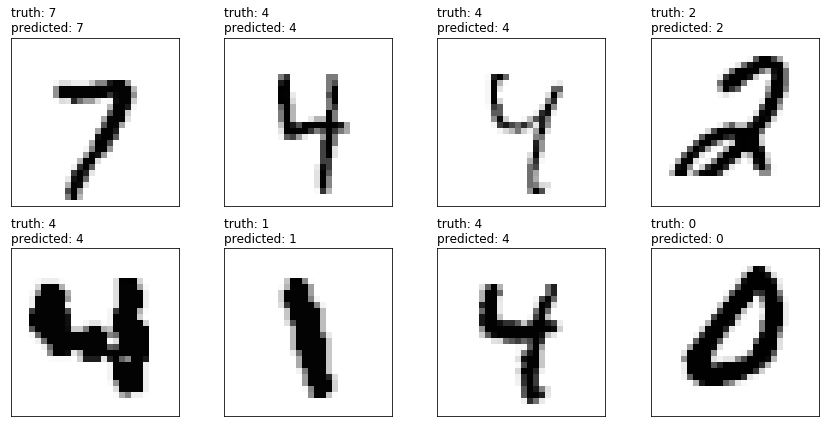

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axs = plt.subplots(2, 4, figsize = (12, 6))
axs = axs.ravel()

for (data, target), ax in zip(validation_loader, axs):
    
    # Compute prediction
    predicted = model(data).argmax(dim = 1)[0]
    target = target[0]
    title = "truth: {0}\npredicted: {1}".format(target, predicted)
    
    # Plot input images.
    ax.matshow(data[0, 0, :, :], cmap = "Greys")
    ax.set_title(title, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()

## [A better classifier, 2 points]

You are now given free hand to improve the very simple digit classification
trained above. Your task is to use a **fully-connected** (no conv nets allowed
in this part) neural network to train a classifier that achieves a validation
error lower than $5\%$.

Apart from the restriction to fully-connected layers, you are allowed (and even encouraged) to use all other available features
from the `pytorch` library.
Helpful `pytorch` sub-modules are the [nn](https://pytorch.org/docs/stable/nn.html) module and the [optmizers](https://pytorch.org/docs/stable/optim.html) module. 

**Add your code below, do not overwrite what you have done above!**

In [34]:
from torch import nn
#loss = nn.NLLLoss()
model2 = SimpleNet()
#gradient_descent(model, training_loader, loss, 0.1)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

import torch.nn.functional as F
epochs = 8
for epoch in range(epochs):
    for (data, target) in training_loader:
        optimizer.zero_grad()
        output = model2(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()



In [35]:
print("Validation error after 8 epoch: {0:.2f}%.".format(validation_error(model2)))

Validation error after 8 epoch: 3.95%.
